# Linear Regression Practical Session

### 1. Introduction
In this session, we will delve into linear regression, both with and without regularization techniques such as Ridge and Lasso. These methods are foundational in machine learning. Our focus will be on predicting diabetes disease progression based on various physical parameters.


Dataset src: "Least Angle Regression". Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2003)

### 2. Objectives
- Gain an understanding of linear regression, as well as Ridge and Lasso regression techniques.  
- Apply these models with sklearn on data.  
- Learn an approach to evaluating model performance.  
- Generate predictions and interpret results through visualization.  

### 3. Setting Up the Environment
Ensure the following libraries are installed:
- **numpy**: "A library for efficient numerical computing and array manipulation."  
- **pandas**: "A tool for data analysis and manipulation using DataFrames."  
- **matplotlib**: "A library for creating customizable visualizations in Python."  
- **seaborn**: "A library for beautiful and easy-to-create statistical plots."  
- **scikit-learn**: "A library for machine learning and model evaluation."  

You can install these libraries using pip:

In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn

In [1]:
#Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler,LabelEncoder


### 4. Understanding Linear Regression


Linear regression is a supervised learning algorithm used to model the relationship between a dependent variable Y and one or more independent variables X.

#### Matrix Formulation of Multiple Linear Regression
In linear regression, the relationship between the input features and the target variable is expressed as:
$$
Y = XW + \epsilon
$$
Where:
- **Y** is the target variable vector (size \( $n \times 1$ \)), where \( n \) is the number of samples (or observations) in the dataset
- **X** is the input feature matrix (size \( $n \times (p+1)$ \)), consisting of \( p \) features and an additional column of 1 for the intercept.
- **W** is the vector of regression coefficients (size $((p+1) \times 1)$)
- **\($\epsilon$)** is the error (residual) vector (size $(n \times 1)$)

The model predicts using this formula: $$\hat{Y} = XW $$
Where:
- **$\hat{Y}$** is the estimated target

And the error will be: $$ \epsilon = Y - \hat{Y} = Y - XW $$.

The objective is to determine \( W \) that minimizes the sum of squared errors, typically computed using the formula:
$$
W = (X^T X)^{-1} X^T Y
$$

This matrix formulation simplifies the understanding of linear regression and is key for computing optimal coefficients.

**Vocabulary**: The process of finding the optimal parameters to build the most accurate model will be called *training* throughout each practical session.


### 6. Loading the Dataset

We will use the **Diabetes Dataset**, which contains a quantitative measure of disease progression one year after the baseline:

- **age**: Age in years
- **sex**: Gender of the patient
- **bmi**: Body mass index
- **bp**: Average blood pressure
- **s1**: Total serum cholesterol (tc)
- **s2**: Low-density lipoproteins (ldl)
- **s3**: High-density lipoproteins (hdl)
- **s4**: Total cholesterol / HDL ratio (tch)
- **s5**: Possibly the log of serum triglycerides level (ltg)
- **s6**: Blood sugar level (glu)
gar level

In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

# Create a pandas DataFrame with the feature data
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Add the target variable to the DataFrame
data['DIABETES_PROGRESS'] = diabetes.target

# Display the first few rows of the dataset
data.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DIABETES_PROGRESS
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### 7. Data Exploration
Let's explore the dataset to understand its structure and the features available.

In [ ]:
# Summary statistics
print(data.describe())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

In [ ]:
print("Check for missing values:\n",data.isnull().sum())

Check for missing values:
 age                  0
sex                  0
bmi                  0
bp                   0
s1                   0
s2                   0
s3                   0
s4                   0
s5                   0
s6                   0
DIABETES_PROGRESS    0
dtype: int64


Machine learning algorithms often perform better when the input and output follows a standard distribution, such as uniform or normal.

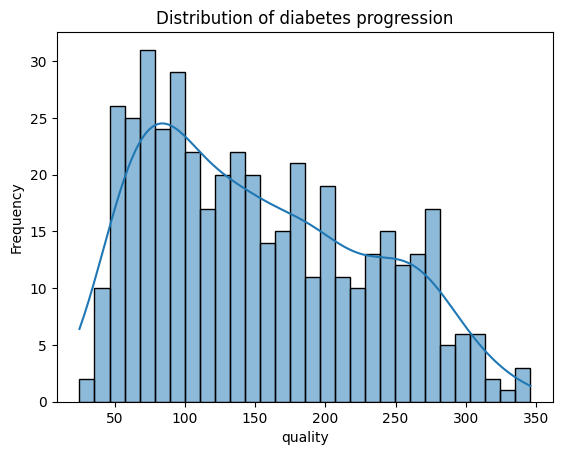

In [ ]:
# Visualizing the distribution of prices
sns.histplot(data['DIABETES_PROGRESS'], bins=30, kde=True)
plt.title('Distribution of diabetes progression')
plt.xlabel('quality')
plt.ylabel('Frequency')
plt.show()

Correlation Matrix:

A correlation matrix is a key tool for understanding relationships between variables in a dataset. It provides insights into:
- **Strength and Direction**: Shows how strongly variables are related (positive or negative correlation).
- **Feature Selection**: Helps identify redundant or highly correlated features to improve model performance.
- **Data Understanding**: Offers an overview of linear dependencies between variables.

Pearson vs. Spearman Correlation:

| **Aspect**         | **Pearson Correlation**                           | **Spearman Correlation**                          |
|---------------------|--------------------------------------------------|--------------------------------------------------|
| **Type of Relationship** | Measures **linear** relationships only.         | Measures **monotonic** relationships, whether linear or not. |
| **Data Sensitivity** | Sensitive to outliers and assumes normally distributed data. | Less sensitive to outliers; works with ordinal data.          |
| **Usage**           | Best for continuous, normally distributed variables. | Suitable for both continuous and ordinal data.   |



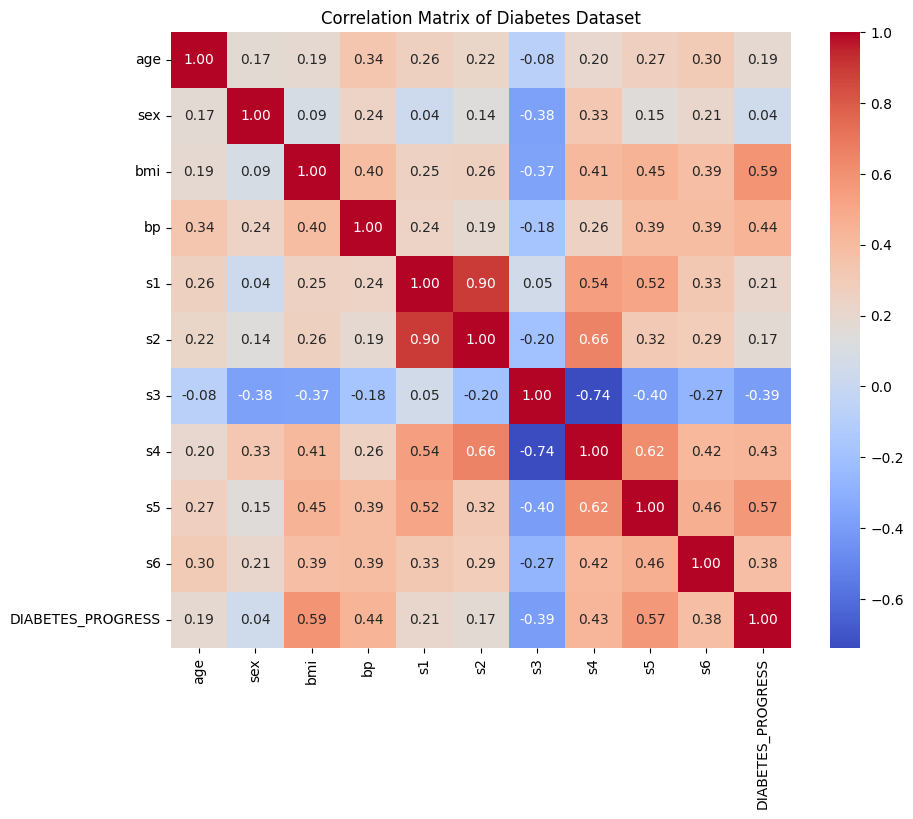

In [ ]:
# Compute and show the correlation matrix
correlation_matrix = data.corr(method='pearson') # you can also try 'pearson' and 'spearman'
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Diabetes Dataset')
plt.show()

### 8. Data Preprocessing
We will separate the features and the target variable (disease progression) and prepare the data for modeling.

In [ ]:
# Features and target variable
X = data.drop(['DIABETES_PROGRESS'], axis=1)
y = data['DIABETES_PROGRESS']
columns_names=X.columns

Machine learning algorithms often perform better when input and output values are scaled to a standard range, such as between 0 and 1. This can be achieved using Min-Max Scaling.

The formula for Min-Max Scaling is:
$$
X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

Where:
-  $X$ is the original value,
-  $X_{\text{min}}$ is the minimum value of the feature,
-  $X_{\text{max}}$ is the maximum value of the feature,
-  $X_{\text{scaled}}$ is the scaled value.

In [ ]:
# Rescale the input to a range between 0 and 1
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

### 9. Splitting the Data
Let's split the data into training and testing sets to assess the model's ability to generalize to unseen data (data that is not used during training).

80% of the data will be used to train the model, and 20% will be used for testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 10. Training the Linear Regression Model
Now, let's train our linear regression model on the training data.

In [ ]:
# Create a linear regression model
model = LinearRegression()

# Train the model to find optimal W
model.fit(X_train, y_train)

LinearRegression()

### 11. Making Predictions
Let's use our model to make some predictions on the test data.

In [ ]:
# Predictions
y_pred = model.predict(X_test)


### 12. Evaluating the Linear Regression Model
We will evaluate the model using Mean Absolute Error (MAE) values. We will evaluate the score on the test set to determine the model's ability to generalize to unseen data (test data).

In [ ]:
# Display the first 5 actual vs predicted prices
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
std_res = np.std(y_test - y_pred)
print(f'Mean Absolute Error (MAE) on test set: {mae}')
print(f'Standard Deviation of Residuals: {std_res}')

     Actual   Predicted
287   219.0  139.547558
211    70.0  179.517208
72    202.0  134.038756
321   230.0  291.417029
73    111.0  123.789659
Mean Absolute Error (MAE) on test set: 42.79409467959993
Standard Deviation of Residuals: 53.71110973246264


### 13. Visualizing Results
We can visualize the actual vs predicted prices.

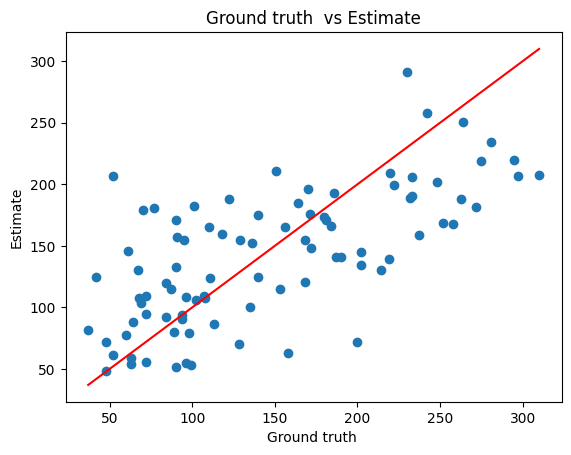

'\n We find the following equation :8.261*age + -23.064*sex + 141.482*bmi + 84.994*bp + -261.464*s1 + 162.879*s2 + 46.327*s3 + 72.031*s4 + 191.187*s5 + 13.306*s6 + -9.056'

In [ ]:
def display_equation(name,coef,intercept):
    equation="\n We find the following equation :"
    for i in range(len(name)):
        equation+=str(round(coef[i],3))+"*"+str(name[i])+" + "
    equation+=str(round(intercept,3))
    return equation
plt.scatter(y_test, y_pred)
plt.xlabel('Ground truth ')
plt.ylabel('Estimate')
plt.title('Ground truth  vs Estimate')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # line of equality

plt.show()
display_equation(columns_names,model.coef_,model.intercept_)


### 14. Understanding Ridge and Lasso Regression
Ridge and Lasso regression are regularization techniques used to prevent overfitting by adding a penalty to the loss function.

- **Lasso Regression**: Adds L1 regularization (absolute value of coefficients), which can also lead to sparse models (some coefficients become zero). This can be useful for feature selection by removing less important features from the dataset.

Minimizes the objective function:
$$||y - Xw||_2 + alpha * ||w||_1$$
- **Ridge Regression**: Adds L2 regularization (squared magnitude of coefficients).
Minimizes the objective function:

$$||y - Xw||_2 + alpha * ||w||_2$$


### 15. Implementing Lasso Regression
Now, let's implement Lasso regression and evaluate its performance.

In [ ]:
# Create and fit a Lasso regression model
lasso_model = Lasso(alpha=0.1)  # alpha is the regularization strength
lasso_model.fit(X_train, y_train)

# Predictions
y_lasso_pred = lasso_model.predict(X_test)

# Evaluate the model
lasso_mae = mean_absolute_error(y_test, y_lasso_pred)


print(f'Lasso Mean Absolute Error: {lasso_mae}')


Lasso Mean Absolute Error: 42.80691595368443


### 16. Implementing Ridge Regression
Let's implement Ridge regression and evaluate its performance.

In [ ]:
# Create and fit a Ridge regression model
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge_model.fit(X_train, y_train)

# Predictions
y_ridge_pred = ridge_model.predict(X_test)

# Evaluate the model
ridge_mae = mean_absolute_error(y_test, y_ridge_pred)

print(f'Ridge Mean Absolute Error: {ridge_mae}')


Ridge Mean Absolute Error: 42.87879531085463


### 17. Comparing Models
Let's compare the performance of Linear, Ridge, and Lasso regression models.

    Model        MAE
0  Linear  42.794095
1   Lasso  42.806916
2   Ridge  42.878795


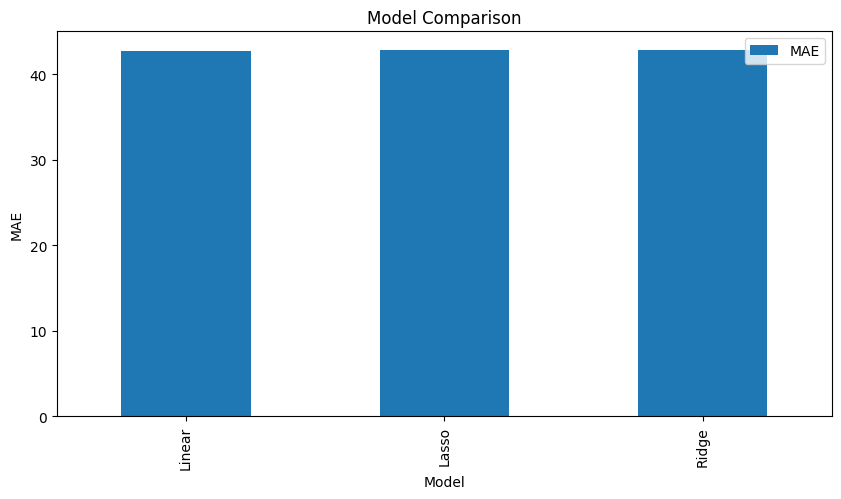

In [ ]:
# Create a DataFrame to compare results
results = pd.DataFrame({
    'Model': ['Linear', 'Lasso', 'Ridge'],
    'MAE': [mae, lasso_mae, ridge_mae],
})

print(results)

# Visualizing the comparison
results.set_index('Model').plot(kind='bar', figsize=(10, 5))
plt.title('Model Comparison')
plt.ylabel('MAE')
plt.show()

We obtained very similar results on the 3 regression (Linear, Ridge, Lasso).

Now, let's see how it impacts **w**, the coefficient associated with each feature.

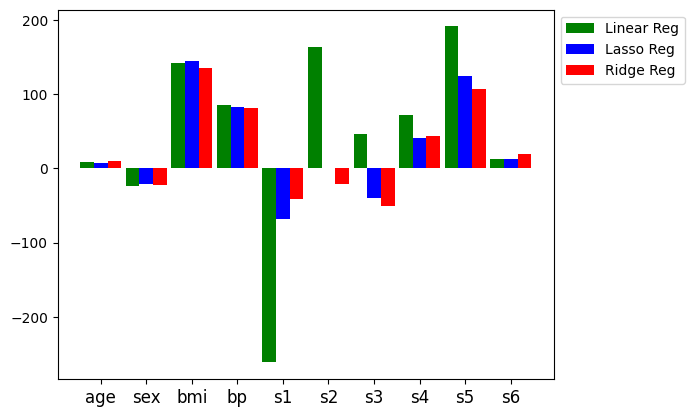

In [ ]:
x = np.arange(len(columns_names))
width = 0.3
fig, ax = plt.subplots()
plt.bar(x, model.coef_, width, color='green', label='Linear Reg')
plt.bar(x + width, lasso_model.coef_, width, color='blue', label='Lasso Reg')
plt.bar(x + 2*width, ridge_model.coef_, width, color='red', label='Ridge Reg')
plt.xticks(x + 2*width / 2, columns_names)
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
ax.set_xticklabels(columns_names, fontsize=12)
plt.show()

### 18. Conclusion and Q&A

In this session, we explored three key regression techniques: **linear regression**, **Ridge regression**, and **Lasso regression** using Python and a real-world dataset. We assessed the performance of each model by evaluating their **Mean Squared Error (MSE)** and visualizing the results.

Despite achieving similar MSE values, these models handle features in distinct ways. **Linear regression** lacks regularization, which can lead to large coefficients for certain features, indicating a strong reliance on them (e.g., **S1**). This can increase the risk of overfitting when features are highly correlated or have varying scales.

On the other hand, **Ridge regression** incorporates **L2 regularization**, which penalizes large coefficients and results in a more balanced distribution of weights across all features. This helps reduce the model’s sensitivity to individual features and mitigate overfitting.

**Lasso regression**, which applies **L1 regularization**, goes a step further by effectively performing **feature selection**. It can shrink some feature coefficients entirely to zero (e.g., **S2**), excluding them from the model. This sparsity encourages a simpler, more interpretable model. However, Ridge regression, due to its L2 penalty, rarely sets coefficients to zero and typically retains all features with adjusted weights.

This comparison highlights how different regularization techniques can shape the interpretability regression models.

###Bonus: Label encoding

Most machine learning models operate exclusively with numerical data. Therefore, categorical labels must be converted into numerical values for algorithms to process them effectively. Scikit-learn's `LabelEncoding` function facilitates this conversion, allowing categorical data to be transformed into numerical form and later retrieved when needed.


In [4]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Fit the encoder with a list of city names (categorical data)
# This process assigns a unique numerical value to each unique category
le.fit(["paris", "paris", "tokyo", "amsterdam"])

# Check the unique classes the encoder has learned
print(le.classes_)

# Convert categorical labels into numerical values
print(le.transform(["tokyo", "tokyo", "paris"]))

# Convert numerical values back into their original categorical labels
print(le.inverse_transform([2, 2, 1]))


['amsterdam' 'paris' 'tokyo']
[2 2 1]
['tokyo' 'tokyo' 'paris']
